In [15]:
import cv2
from matplotlib import pyplot as plt
import numpy as np



In [205]:
def get_max_frequency(img):
        img = np.fft.fft2(img)
        img = np.fft.fftshift(img)
        img=np.abs(img)
        max = np.amax(img, axis=(0, 1))
        
        return max

In [248]:
def get_min_frequency(img):
        img = np.fft.fft2(img)
        img = np.fft.fftshift(img)
        img=np.abs(img)
        min = np.amin(img, axis=(0, 1))
        return min

In [249]:
def low_pass_filter(img, cutoff):
        img = np.fft.fft2(img)
        img = np.fft.fftshift(img)
        # get magnitude
        mag = np.abs(img)
        # get phase
        phase = np.angle(img)
        for i in range(mag[0].size):
            for j in range(mag[1].size):
                if(mag[i][j] > cutoff):
                    mag[i][j] = 0
        img = mag * np.exp(1j * phase)
        img = np.fft.ifftshift(img)
        img = np.fft.ifft2(img)
        img = np.abs(img)
        return img

In [208]:
def high_pass_filter( img, cutoff):
        img = np.fft.fft2(img)
        img = np.fft.fftshift(img)
        # get magnitude
        mag = np.abs(img)
        # get phase
        phase = np.angle(img)
        for i in range(mag[0].size):
            for j in range(mag[1].size):
                if(mag[i][j] < cutoff):
                    mag[i][j] = 0
        img = mag * np.exp(1j * phase)
        img = np.fft.ifftshift(img)
        img = np.fft.ifft2(img)
        img = np.abs(img)
        return img

In [20]:
def hypridImages(img1, img2):
        return img1+img2

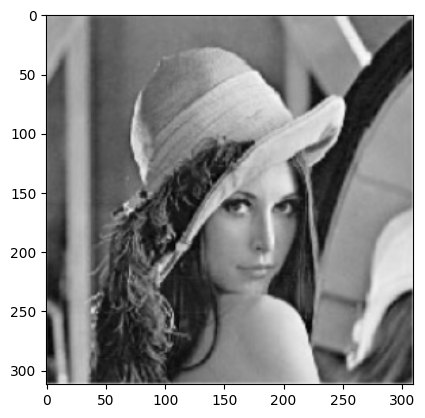

In [21]:
img = cv2.imread('../images/lena.jpg',0)
plt.imshow(img,cmap='gray')

In [231]:
maxFreq=get_max_frequency(img)

minFreq=get_min_frequency(img)

print(maxFreq)
print(minFreq)



11595592.0
1.600724602971236
10436032.96007246


11595592.0


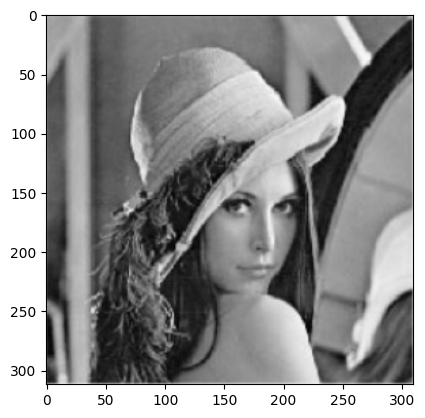

In [280]:
cutoff= maxFreq
print(cutoff)
low_img=low_pass_filter(img,cutoff)
plt.imshow(low_img,cmap='gray')

10001.600724602971


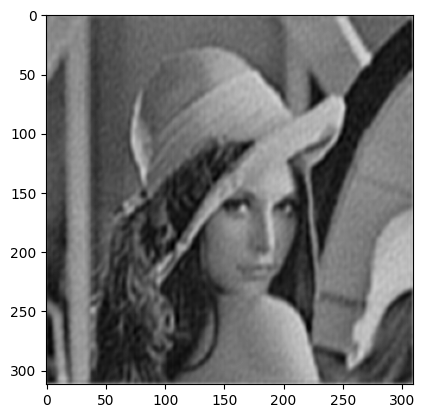

In [265]:
cutoff= minFreq + 10000
print(cutoff)
high_img=high_pass_filter(img,cutoff)
plt.imshow(high_img,cmap='gray')

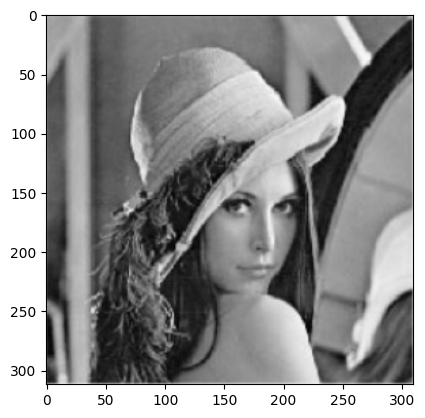

In [260]:
new_img=hypridImages(high_img,low_img)
plt.imshow(new_img,cmap='gray')